<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [44]:
# file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv('survey_data.csv')

# Display the first few rows to check if data is loaded correctly
# print(df.head())


In [45]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [49]:
## Write your code here
duplicates_all = df[df.duplicated(keep=False)]
duplicates_all.duplicated().sum()

0

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [52]:
## Write your code here
missing_values_CodingActivities = df['CodingActivities'].isnull().sum()
missing_values_CodingActivities

10971

##### Task 3: Impute missing values in CodingActivities with forward-fill.


In [55]:
## Write your code here
df['CodingActivities'].fillna(method='ffill', inplace=True)
missing_values_CodingActivities = df['CodingActivities'].isnull().sum()
missing_values_CodingActivities

C:\Users\serge\AppData\Local\Temp\ipykernel_8440\3994196725.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CodingActivities'].fillna(method='ffill', inplace=True)
C:\Users\serge\AppData\Local\Temp\ipykernel_8440\3994196725.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivities'].fillna(method='ffill', inplace=True)


0

**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [59]:
## Write your code here
print("Column names:", df.columns.tolist())

Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [62]:
missing_values_ConvertedCompYearly = df['ConvertedCompYearly'].isnull().sum()
missing_values_ConvertedCompYearly

42002

In [88]:
ConvertedCompYearly_mean = df['ConvertedCompYearly'].mean()
df['ConvertedCompYearly'].fillna(ConvertedCompYearly_mean, inplace=True)
missing_values_ConvertedCompYearly = df['ConvertedCompYearly'].isnull().sum()
missing_values_ConvertedCompYearly


C:\Users\serge\AppData\Local\Temp\ipykernel_8440\1476892739.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(ConvertedCompYearly_mean, inplace=True)


0

In [84]:
## Write your code here
# Min-Max normalization
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - df['ConvertedCompYearly'].min()) / (df['ConvertedCompYearly'].max() - df['ConvertedCompYearly'].min())
df['ConvertedCompYearly_MinMax'].describe()

count    65437.000000
mean         0.005300
std          0.006875
min          0.000000
25%          0.005300
50%          0.005300
75%          0.005300
max          1.000000
Name: ConvertedCompYearly_MinMax, dtype: float64

##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [82]:
## Write your code here

# Z-score normalization
mean = df['ConvertedCompYearly'].mean()
std = df['ConvertedCompYearly'].std()

df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean) / std
df['ConvertedCompYearly_Zscore'].describe()

count    6.543700e+04
mean     1.401327e-16
std      1.000000e+00
min     -7.708772e-01
25%      1.302052e-16
50%      1.302052e-16
75%      1.302052e-16
max      1.446873e+02
Name: ConvertedCompYearly_Zscore, dtype: float64

### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_Normalized`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


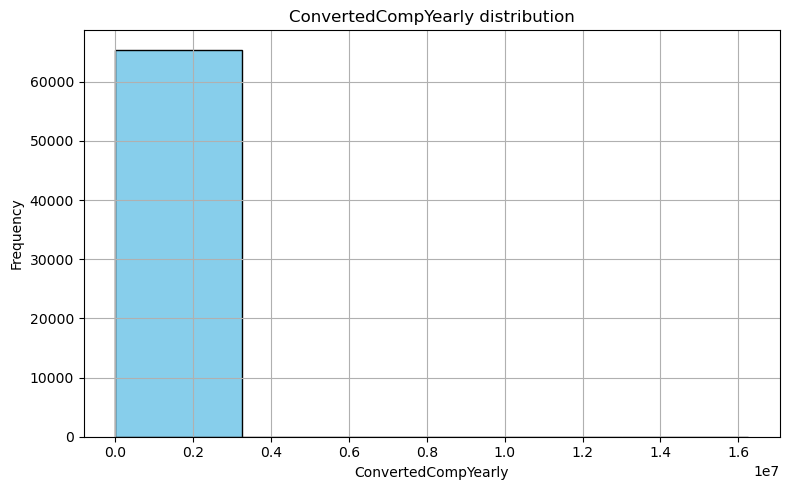

In [72]:
## Write your code here
# Plot a histogram of ConvertedCompYearly
plt.figure(figsize=(8, 5))
plt.hist(df['ConvertedCompYearly'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('ConvertedCompYearly distribution')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

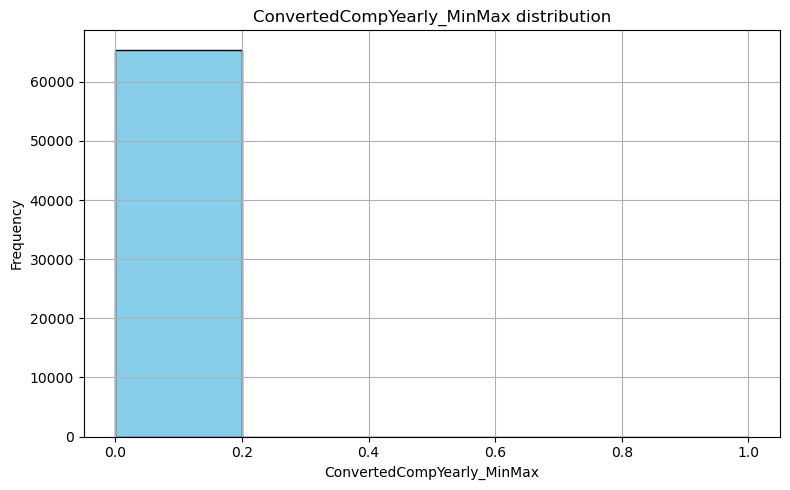

In [74]:
# # Plot a histogram of ConvertedCompYearly_MinMax
plt.figure(figsize=(8, 5))
plt.hist(df['ConvertedCompYearly_MinMax'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('ConvertedCompYearly_MinMax distribution')
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

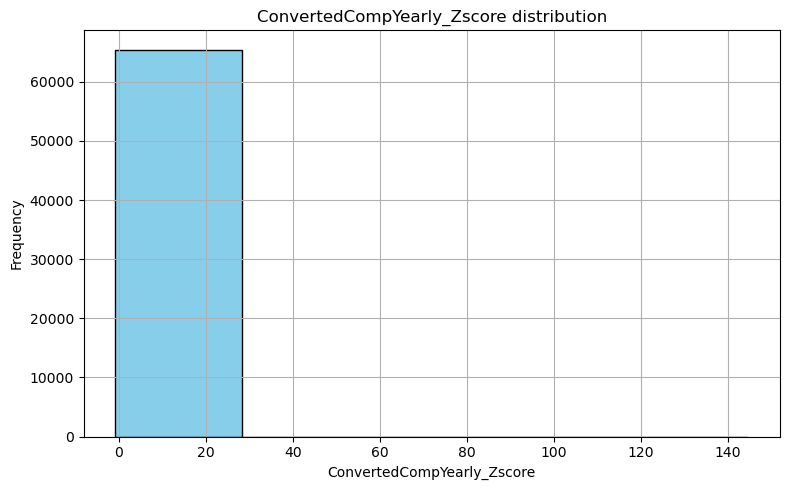

In [76]:
# # Plot a histogram of ConvertedCompYearly_Zscore
plt.figure(figsize=(8, 5))
plt.hist(df['ConvertedCompYearly_Zscore'], bins=5, color='skyblue', edgecolor='black')

# Add labels and title
plt.title('ConvertedCompYearly_Zscore distribution')
plt.xlabel('ConvertedCompYearly_Zscore')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
